# Exploratory Data Analysis Continued

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
from scipy import stats

In [3]:
dataset = pd.read_csv('Data/df_cleaned.csv')

In [4]:
df = dataset.drop(columns=['Unnamed: 0'])

In [5]:
# shape and types
print(df.shape)

(9253, 44)


In [6]:
num_cols = df.select_dtypes(include="float64").columns
cat_cols = df.select_dtypes(exclude="float64").columns

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

Numerical columns: 18
Categorical columns: 26


In [7]:
print(df.dtypes)

# Convert all object columns to category
df_cleaned = df.astype({col: "category" for col in df.select_dtypes(include="object").columns})

#print(df.dtypes)

Had_alcohol_in_the_past                             object
General_hearing_condition                           object
Had_high_blood_pressure                             object
WBC                                                float64
Haemoglobin                                        float64
Platelete                                          float64
Gender                                              object
Age                                                float64
Race_Ethnicity                                      object
Country_of_Birth                                    object
Education_Level                                     object
Marital_Status                                      object
Household_Size                                     float64
Income_to_Poverty_Ratio                            float64
Has_diabetes                                        object
Takes_vitamin_supplements                           object
Has_Disability                                      obje

In [8]:
# missing values
df.isna().sum().sort_values(ascending=False)

Had_alcohol_in_the_past                            0
General_hearing_condition                          0
Has_Kidney_Failure                                 0
Had_Asthma                                         0
Had_Arthritis                                      0
Had_heart_attack                                   0
Had_Thyroid                                        0
Had_Liver_COndition                                0
Had_Cancer                                         0
Teeth_and_gum_health                               0
Number_of_Moderate_Physical_activities_per_week    0
Number_of_Vigorous_Physical_activities_per_week    0
Number_of_hours_of_sleep                           0
Cholestrol_level                                   0
SystolicBP                                         0
DiastolicBP                                        0
Pulse                                              0
BODY_MEASURE_COMPOSITE                             0
blood_macros                                  

In [9]:
# Categorical summary
cat_summary = df.describe(include='object').T
cat_summary[['count','unique','top','freq']]

,count,unique,top,freq
Had_alcohol_in_the_past,9253,3,Yes,7503
General_hearing_condition,9253,7,Good,3617
Had_high_blood_pressure,9253,3,No,5106
Gender,9253,2,Female,5051
Race_Ethnicity,9253,5,Non-Hispanic White,5133
Country_of_Birth,9253,2,Born in 50 US states or Washington,7516
Education_Level,9253,6,Some college or AA degree,2640
Marital_Status,9253,4,Married/Living with partner,4140
Has_diabetes,9253,4,No,7899
Takes_vitamin_supplements,9253,2,No,9044


### Observations: 

1. Most health condition variables are heavily skewed toward "No":
- Takes_vitamin_supplements: 98% say "No" (9044/9253)
- Has_Hepatitis: 98% say "No"
- Has_Kidney_Failure: 84% say "No"
- Had_heart_attack: 83% say "No"
- This imbalance could cause these features to have minimal impact on clustering.

In [10]:
# Numerical summary
num_summary = df.describe().T
num_summary[['count','mean','std','min','25%','50%','75%','max']]

,count,mean,std,min,25%,50%,75%,max
WBC,9253.0,6.857122,1.784486,2.100000e+00,5.800000e+00,6.700000e+00,7.500000,18.400000
Haemoglobin,9253.0,13.823884,1.296819,6.300000e+00,1.320000e+01,1.390000e+01,14.500000,18.600000
Platelete,9253.0,259.584729,61.827494,4.600000e+01,2.230000e+02,2.540000e+02,286.000000,787.000000
Age,9253.0,47.304010,21.811206,6.000000e+00,2.900000e+01,5.000000e+01,66.000000,80.000000
Household_Size,9253.0,2.865665,1.608452,1.000000e+00,2.000000e+00,2.000000e+00,4.000000,7.000000
Income_to_Poverty_Ratio,9253.0,2.797627,1.536599,5.397605e-79,1.510000e+00,2.740000e+00,4.300000,5.000000
HDL_mg,9253.0,53.628877,12.215467,2.200000e+01,4.700000e+01,5.200000e+01,58.000000,159.000000
Family_poverty_level_index,9253.0,2.572908,1.421429,5.397605e-79,1.520000e+00,2.430000e+00,3.520000,5.000000
Number_of_Moderate_Physical_activities_per_week,9253.0,50.801578,683.308082,-1.000000e+00,5.397605e-79,2.000000e+00,3.000000,9999.000000
Number_of_Vigorous_Physical_activities_per_week,9253.0,41.224144,629.398728,-1.000000e+00,5.397605e-79,5.397605e-79,2.000000,9999.000000


### Observations

1. Number_of_Moderate_Physical_activities_per_week and Number_of_Vigorous_Physical_activities_per_week contain coded missing values:
- Max value = 9999 (missing data code)
- Min value = -1 (another missing code)
- These artificially inflate means to 50.8 and 41.2

2. Near-Zero Values
- Income_to_Poverty_Ratio min: 5.397605e-79 (essentially 0)
- Family_poverty_level_index min: 5.397605e-79
- Number_of_Vigorous_Physical_activities_per_week: 50th percentile = 5.397605e-79 (mostly zeros)

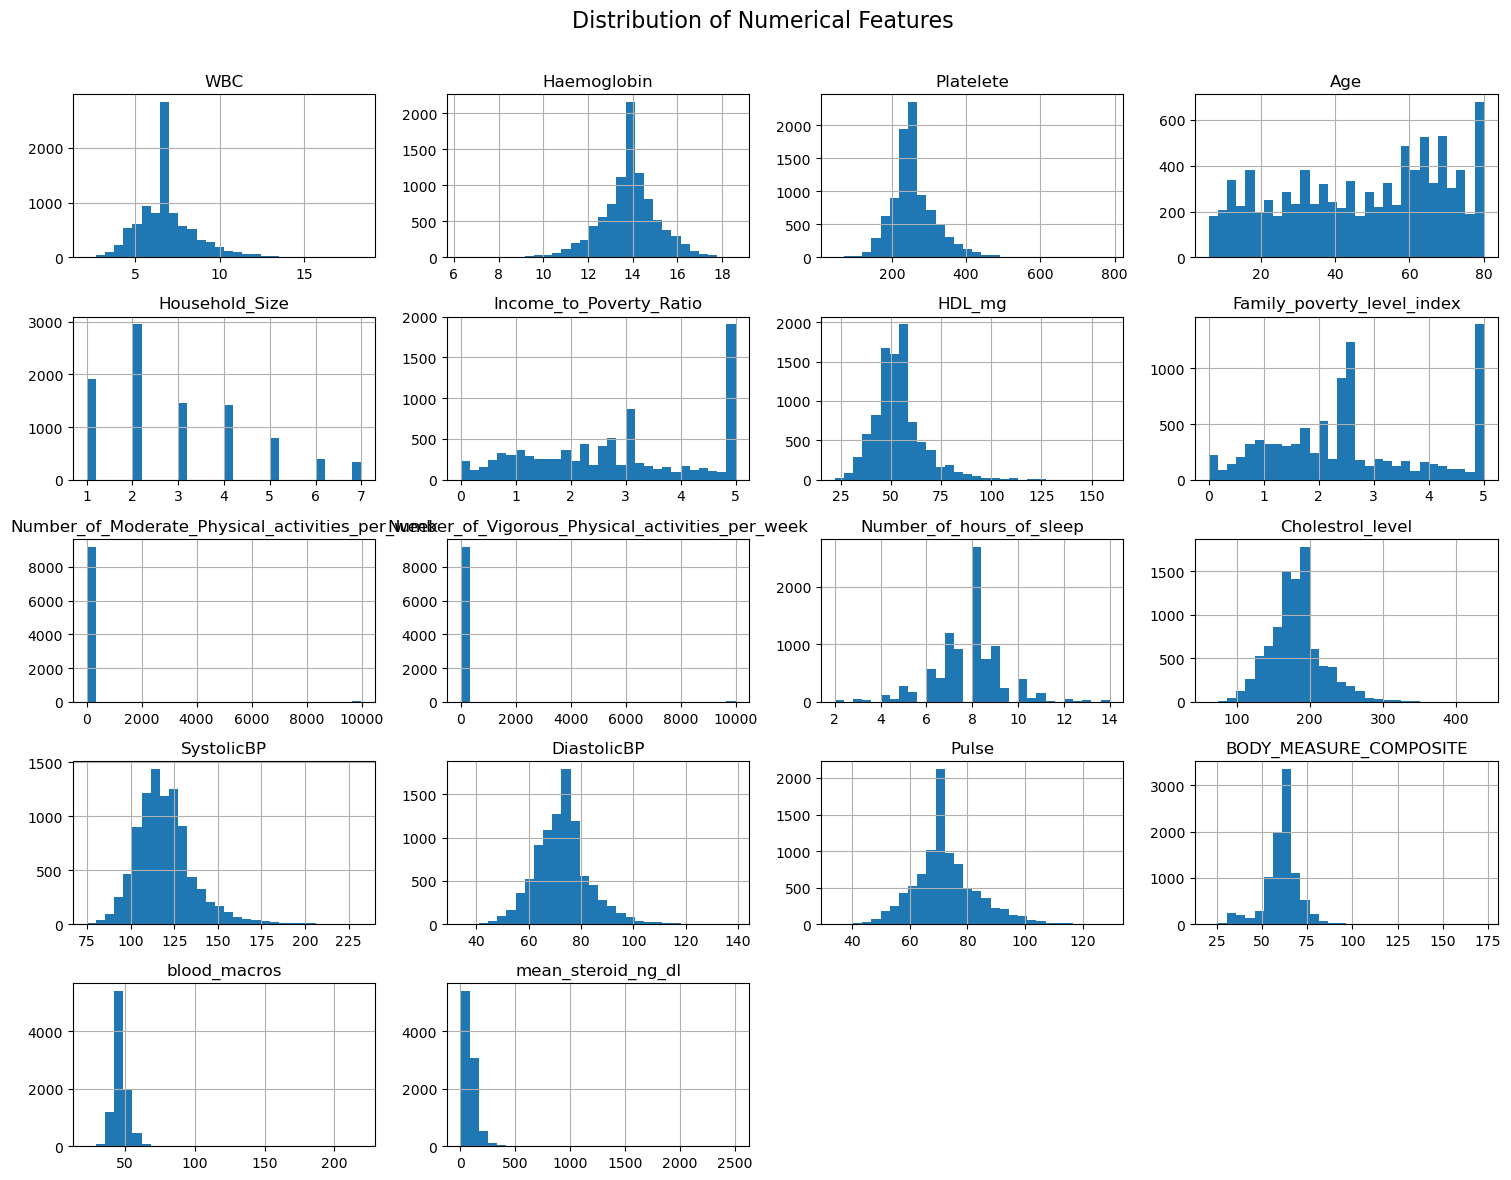

In [11]:
# Histograms for numeric features
df[num_cols].hist(bins=30, figsize=(15,12))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for title
plt.show()

### Observations: 
1. Physical Activity Variables
- Massive spikes at 0 and 9999 confirm these are missing data codes
- ~9000 observations at 0 (likely "not applicable" or true zeros)
- Remaining data at 9999 (missing/refused)
Suggestion: Drop

2. Problematic Distributions for Clustering
- Household_Size: Discrete, heavily concentrated at 1-2 (living alone/couples) (Suggestion: Check if categorical, Convert to categorical?)
- Income_to_Poverty_Ratio: Spike at 5 (likely capped/coded value) (Handled below)
- Family_poverty_level_index: Similar spike at 5
- mean_steroid_ng_dl: Extreme right skew with massive spike at 0 (Suggestion: Log Transformation)
- BODY_MEASURE_COMPOSITE: Spike around 60-70 (possible BMI?) (Suggestion: Use ROBUST SCALING)

In [12]:
moderate_col = "Number_of_Moderate_Physical_activities_per_week"
vigorous_col = "Number_of_Vigorous_Physical_activities_per_week"

In [13]:
# First, count the occurrences of invalid values
invalid_values = [9999, 7777]

print("Count of invalid values BEFORE removal:")
print(f"Rows with 9999 in moderate: {(df[moderate_col] == 9999).sum()}")
print(f"Rows with 7777 in moderate: {(df[moderate_col] == 7777).sum()}")
print(f"Rows with 9999 in vigorous: {(df[vigorous_col] == 9999).sum()}")
print(f"Rows with 7777 in vigorous: {(df[vigorous_col] == 7777).sum()}")

# Count unique rows with any invalid value (some rows might have invalid values in both columns)
mask_invalid = df[moderate_col].isin(invalid_values) | df[vigorous_col].isin(invalid_values)
print(f"\nTotal unique rows with at least one invalid value: {mask_invalid.sum()}")

# Show breakdown of which rows have what
print("\nDetailed breakdown:")
both_invalid = df[moderate_col].isin(invalid_values) & df[vigorous_col].isin(invalid_values)
only_moderate_invalid = df[moderate_col].isin(invalid_values) & ~df[vigorous_col].isin(invalid_values)
only_vigorous_invalid = ~df[moderate_col].isin(invalid_values) & df[vigorous_col].isin(invalid_values)

print(f"Rows with invalid values in BOTH columns: {both_invalid.sum()}")
print(f"Rows with invalid values ONLY in moderate: {only_moderate_invalid.sum()}")
print(f"Rows with invalid values ONLY in vigorous: {only_vigorous_invalid.sum()}")

# Now remove those rows
df_cleaned = df[~mask_invalid].copy()

print(f"\n{'='*50}")
print(f"REMOVAL SUMMARY:")
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Total rows removed: {len(df) - len(df_cleaned)}")
print(f"{'='*50}")

# Verify removal worked
print("\nVerification - Count in CLEANED dataset:")
print(f"Rows with 9999 in moderate: {(df_cleaned[moderate_col] == 9999).sum()}")
print(f"Rows with 7777 in moderate: {(df_cleaned[moderate_col] == 7777).sum()}")
print(f"Rows with 9999 in vigorous: {(df_cleaned[vigorous_col] == 9999).sum()}")
print(f"Rows with 7777 in vigorous: {(df_cleaned[vigorous_col] == 7777).sum()}")

Count of invalid values BEFORE removal:
Rows with 9999 in moderate: 38
Rows with 7777 in moderate: 9
Rows with 9999 in vigorous: 35
Rows with 7777 in vigorous: 3

Total unique rows with at least one invalid value: 70

Detailed breakdown:
Rows with invalid values in BOTH columns: 15
Rows with invalid values ONLY in moderate: 32
Rows with invalid values ONLY in vigorous: 23

REMOVAL SUMMARY:
Original dataset size: 9253
Cleaned dataset size: 9183
Total rows removed: 70

Verification - Count in CLEANED dataset:
Rows with 9999 in moderate: 0
Rows with 7777 in moderate: 0
Rows with 9999 in vigorous: 0
Rows with 7777 in vigorous: 0


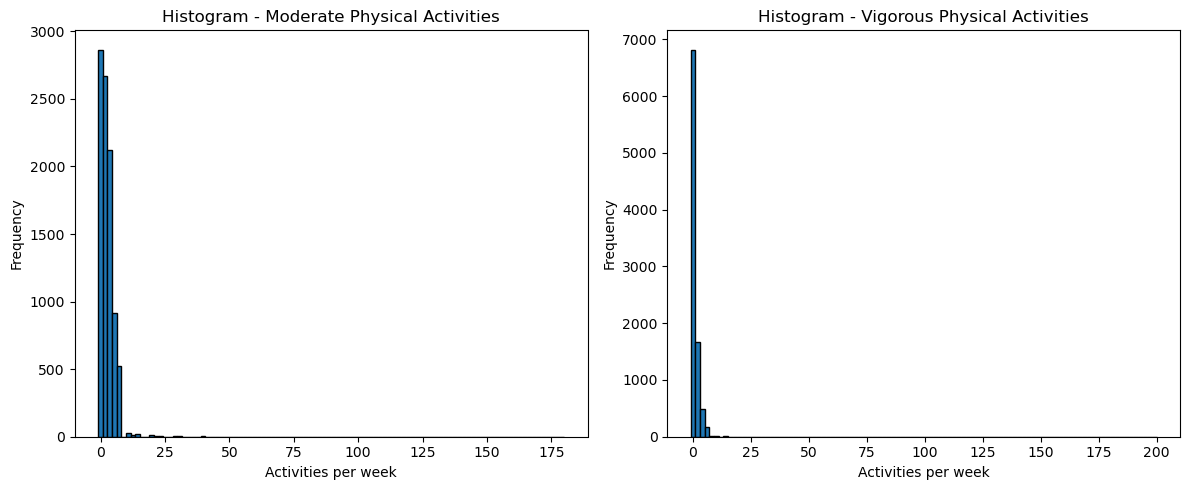

In [14]:
# Plot histograms for both columns side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Moderate activities
axes[0].hist(df_cleaned[moderate_col], bins=100, edgecolor="black")
axes[0].set_title("Histogram - Moderate Physical Activities")
axes[0].set_xlabel("Activities per week")
axes[0].set_ylabel("Frequency")

# Vigorous activities
axes[1].hist(df_cleaned[vigorous_col], bins=100, edgecolor="black")
axes[1].set_title("Histogram - Vigorous Physical Activities")
axes[1].set_xlabel("Activities per week")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [15]:
# Check Age_Group for rows with -1 in moderate activity
rows_with_minus1_moderate = df[df[vigorous_col] == -1]

# Display Age_Group distribution for these rows
print(f"Age_Group distribution for rows with -1 in Vigorous activity:")
print(rows_with_minus1_moderate['Age_Group'].value_counts().sort_index())

Age_Group distribution for rows with -1 in Vigorous activity:
0-18    1187
Name: Age_Group, dtype: int64


### Action Taken

- Removed 9999 and 7777 values from physical activity columns  
-  -1 are imputed values (represents NA) while handling null values , checked if the -1 are only in age group 0-18

In [16]:
# Check if 5 is a cap value
print(f"Percentage at exactly 5: {(df_cleaned['Income_to_Poverty_Ratio'] == 5).mean()*100:.1f}%")

# Check correlation between these two
print(f"Correlation: {df_cleaned['Income_to_Poverty_Ratio'].corr(df_cleaned['Family_poverty_level_index']):.3f}")

Percentage at exactly 5: 19.9%
Correlation: 0.811


### Poverty Variables

1. High correlation (0.811) between the two poverty variables
- They're measuring nearly the same thing
- Keeping both would add multicollinearity without new information
- Suggestion: Drop one (probably Family_poverty_level_index since Income_to_Poverty_Ratio is more interpretable)

2. 19.8% of data (1,834 out of 9,253) is capped at 5.0
- This is a censored/topcoded variable - common in survey data for privacy
- Sugesstion: Create Ordinal Categories for censored data

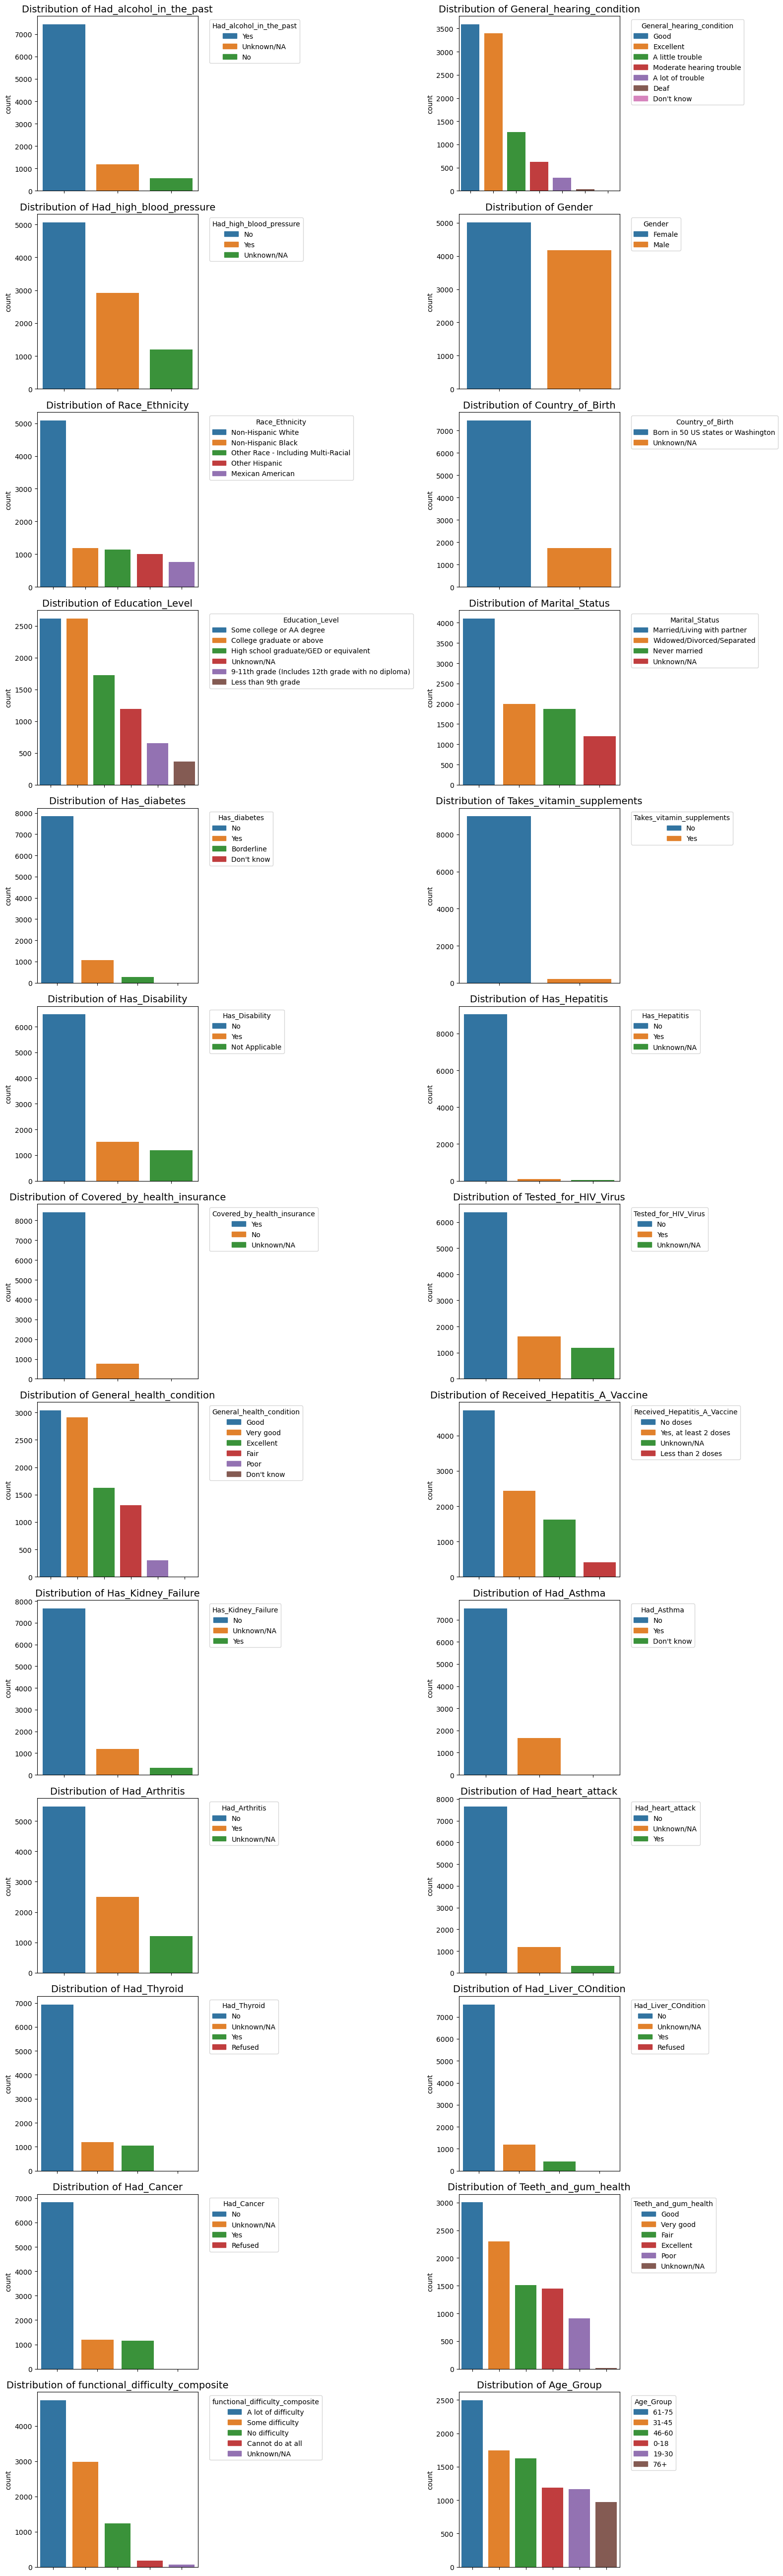

In [17]:
# Calculate grid dimensions
n_plots = len(cat_cols)
n_cols = 2  # Two charts per row
n_rows = math.ceil(n_plots / n_cols)

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))

# Flatten axes array for easier iteration
if n_plots == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

# Plot each categorical column
for idx, col in enumerate(cat_cols):
    ax = axes[idx]
    
    # Create count plot
    sns.countplot(data=df_cleaned, x=col, palette="tab10", 
                  order=df_cleaned[col].value_counts().index, ax=ax)
    
    # Hide x-axis labels (to avoid overlap)
    ax.set_xticklabels([])
    ax.set_xlabel("")
    
    # Move categories into a legend
    handles, labels = ax.get_legend_handles_labels()
    if not handles:  # add manually if sns doesn't auto-create
        handles = [plt.Rectangle((0,0),1,1, color=ax.patches[i].get_facecolor()) 
                   for i in range(len(df_cleaned[col].unique()))]
        labels = df_cleaned[col].value_counts().index.tolist()
    
    # Add legend to the right of each subplot
    ax.legend(handles, labels, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_title(f"Distribution of {col}", fontsize=14)

# Hide any empty subplots if odd number of plots
if n_plots < len(axes):
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### Severe Class Imbalance in Categorical Variables

1. Near-Zero Variance (>95% in one category)
- `Takes_vitamin_supplements`: 98% No
- `Has_Hepatitis`: 98% No
- `Has_Kidney_Failure`: 84% No

**Action:** DROP `Takes_vitamin_supplements` and `Has_Hepatitis`

2. High Imbalance (70-90% in one category)
- `Had_heart_attack`: 83% No
- `Had_Liver_Condition`: 82% No
- `Had_Asthma`: 82% No
- `Had_Thyroid`: 76% No
- `Had_Cancer`: 74% No

**Action:** Create composite `chronic_conditions_count` and `cardiovascular_risk` indicators
- Chronic Conditions Count, Cardiovascular Risk Score, Metabolic Indicators

In [18]:
# Check if zeros appear together (same people have multiple zeros)
zero_cols = ['SystolicBP', 'DiastolicBP', 
             'Number_of_Moderate_Physical_activities_per_week',
             'Number_of_Vigorous_Physical_activities_per_week',
             'blood_macros', 'mean_steroid_ng_dl']

# Create a zero indicator
df_cleaned['zero_count'] = (df_cleaned[zero_cols] == 0).sum(axis=1)
print("Distribution of zero counts per row:")
print(df_cleaned['zero_count'].value_counts().sort_index())

# See if people with zero BP also have zero physical activity
zero_bp = df_cleaned[(df_cleaned['SystolicBP'] == 0) | (df_cleaned['DiastolicBP'] == 0)]
print(f"\nRows with zero blood pressure: {len(zero_bp)}")
print("Their physical activity distribution:")
print(zero_bp['Number_of_Moderate_Physical_activities_per_week'].value_counts())

Distribution of zero counts per row:
0    9183
Name: zero_count, dtype: int64

Rows with zero blood pressure: 0
Their physical activity distribution:
Series([], Name: Number_of_Moderate_Physical_activities_per_week, dtype: int64)


### Action Item:

**No action needed for these variables** - they're all properly recorded with no true zeros. The only problematic variables are the physical activity ones which are already handled.

In [19]:
# Check variance - low variance features won't help clustering
variance = df_cleaned[num_cols].var().sort_values()
print("Low variance features (consider removing):")
print(variance[variance < 0.01])

Low variance features (consider removing):
Series([], dtype: float64)


### Observations:
- All 18 numerical features passed the variance test
- No numerical features need to be dropped for low variance
- Each feature contributes unique information for clustering

In [20]:
# Check feature scales - clustering is sensitive to scale
print("Feature ranges:")
for col in num_cols:
    print(f"{col}: [{df_cleaned[col].min():.2f}, {df_cleaned[col].max():.2f}]")

# Features like Income_to_Poverty_Ratio vs Pulse have vastly different scales
# You'll need StandardScaler or MinMaxScaler

Feature ranges:
WBC: [2.10, 18.40]
Haemoglobin: [6.30, 18.60]
Platelete: [46.00, 787.00]
Age: [6.00, 80.00]
Household_Size: [1.00, 7.00]
Income_to_Poverty_Ratio: [0.00, 5.00]
HDL_mg: [22.00, 138.00]
Family_poverty_level_index: [0.00, 5.00]
Number_of_Moderate_Physical_activities_per_week: [-1.00, 180.00]
Number_of_Vigorous_Physical_activities_per_week: [-1.00, 200.00]
Number_of_hours_of_sleep: [2.00, 14.00]
Cholestrol_level: [62.00, 438.00]
SystolicBP: [74.67, 232.33]
DiastolicBP: [34.00, 139.00]
Pulse: [34.00, 129.33]
BODY_MEASURE_COMPOSITE: [20.70, 172.60]
blood_macros: [22.59, 219.35]
mean_steroid_ng_dl: [1.34, 2509.80]


In [21]:
# Outliers can create single-point clusters
outlier_report = {}
for col in num_cols:
    z_scores = np.abs(stats.zscore(df_cleaned[col].dropna()))
    outliers = (z_scores > 3).sum()
    outlier_report[col] = outliers

print("Features with many outliers (>1% of data):")
threshold = len(df_cleaned) * 0.01
for col, count in sorted(outlier_report.items(), key=lambda x: x[1], reverse=True):
    if count > threshold:
        print(f"{col}: {count} outliers ({count/len(df_cleaned)*100:.1f}%)")

Features with many outliers (>1% of data):
Number_of_hours_of_sleep: 147 outliers (1.6%)
WBC: 141 outliers (1.5%)
HDL_mg: 125 outliers (1.4%)
BODY_MEASURE_COMPOSITE: 121 outliers (1.3%)
SystolicBP: 119 outliers (1.3%)
Platelete: 114 outliers (1.2%)
Haemoglobin: 97 outliers (1.1%)


### Observations: 

#### Low Percentage
- 1-1.6% is normal in health data
- Removing would lose 500+ patients unnecessarily

In [22]:
# First, make sure you have clean numerical columns
clean_num_cols = [col for col in num_cols if col not in 
                  ['Number_of_Moderate_Physical_activities_per_week',
                   'Number_of_Vigorous_Physical_activities_per_week']]

# Calculate correlation matrix
corr_matrix = df_cleaned[clean_num_cols].corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")
print(f"Features being analyzed: {len(clean_num_cols)}")

Correlation matrix shape: (16, 16)
Features being analyzed: 16


c:\Users\varsh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


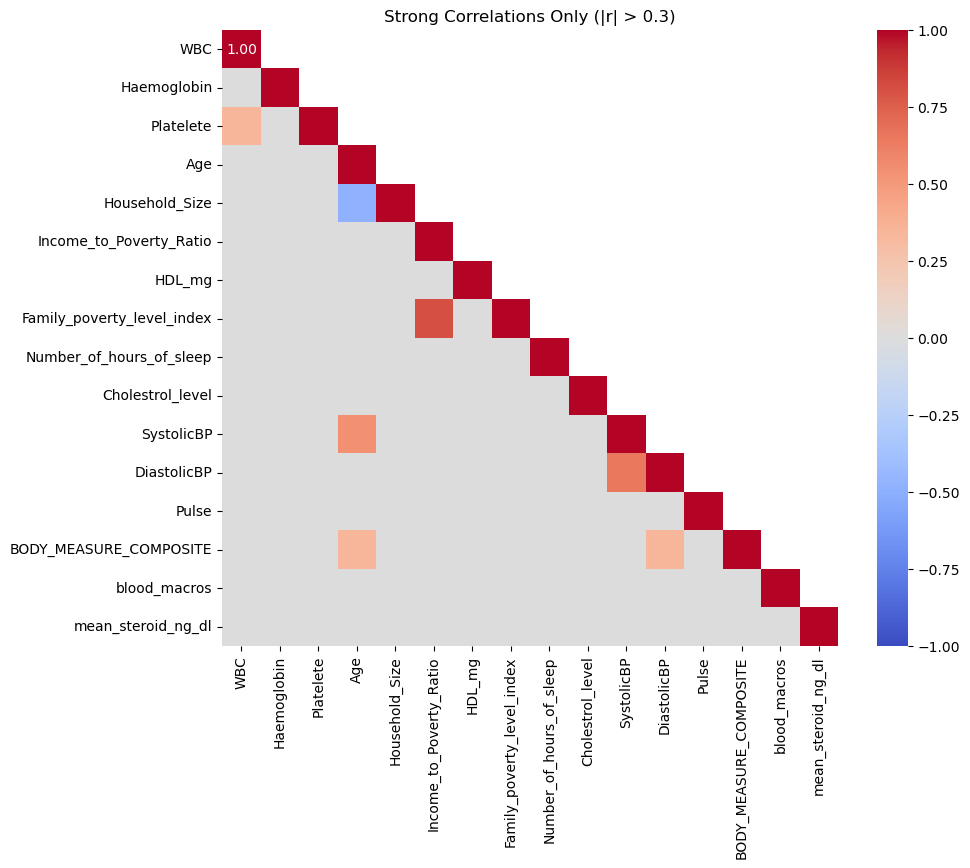


Found 7 strong correlations:
  Income_to_Poverty_Ratio   ↔ Family_poverty_level_index: r=0.811
  SystolicBP                ↔ DiastolicBP              : r=0.648
  Age                       ↔ SystolicBP               : r=0.540
  Age                       ↔ Household_Size           : r=-0.487
  WBC                       ↔ Platelete                : r=0.349
  Age                       ↔ BODY_MEASURE_COMPOSITE   : r=0.348
  DiastolicBP               ↔ BODY_MEASURE_COMPOSITE   : r=0.344


In [23]:
# Create a copy to modify
strong_corr = corr_matrix.copy()

# Set weak correlations (|r| < 0.3) to zero
strong_corr[np.abs(strong_corr) < 0.3] = 0

# Plot only strong correlations with numbers
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(strong_corr), k=1)

sns.heatmap(strong_corr, 
            mask=mask,
            cmap='coolwarm', 
            center=0,
            annot=True,          # Show correlation values
            fmt='.2f',           # Format to 2 decimal places
            square=True,
            vmin=-1, vmax=1)

ax.set_title('Strong Correlations Only (|r| > 0.3)')
plt.show()

# Print summary
strong_pairs = []
for i in range(len(strong_corr.columns)):
    for j in range(i+1, len(strong_corr.columns)):
        if abs(strong_corr.iloc[i, j]) > 0.3:
            strong_pairs.append((strong_corr.columns[i], 
                               strong_corr.columns[j], 
                               strong_corr.iloc[i, j]))

print(f"\nFound {len(strong_pairs)} strong correlations:")
for feat1, feat2, corr in sorted(strong_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]:
    print(f"  {feat1:25} ↔ {feat2:25}: r={corr:.3f}")

### Obeservations:

1. **Blood Pressure Cluster** 
- **SystolicBP ↔ DiastolicBP**: ~0.65 (strong positive)
- These naturally correlate - both measure blood pressure
- **Suggestion**: Create a single BP metric or keep both

2. **Interesting Weak Correlations**
- **Age ↔ SystolicBP**: ~0.35 (mild positive) - BP increases with age
- **Platelet ↔ Age**: Appears negative (slight blue) - platelets decrease with age
- **Household_Size ↔ Age**: Negative (blue) - older people live in smaller households

3. **Notable Isolated Features** 
- **mean_steroid_ng_dl**: No strong correlations with anything
- **blood_macros**: No strong correlations
- **HDL_mg**: No strong correlations
- **Number_of_hours_of_sleep**: No strong correlations
These might add unique information

4. **Body Measure Patterns**
- **BODY_MEASURE_COMPOSITE ↔ SystolicBP**: ~0.32 (mild positive)
- **BODY_MEASURE_COMPOSITE ↔ Pulse**: ~0.35 (mild positive)
- Suggests this might be weight related

In [26]:
df_cleaned.shape
df_cleaned.to_csv('Data/df_cleaned_v2.csv', index=False)

In [29]:
check_df = pd.read_csv('Data/df_cleaned_v2.csv')
check_df.head()
check_df.shape

(9183, 45)

# Data Preprocessing Summary

## Key Observations & Actions

### 1. Physical Activity Variables 
**Observation**: 
- `Number_of_Moderate_Physical_activities_per_week` and `Number_of_Vigorous_Physical_activities_per_week` contain coded missing values (9999, 7777, -1)

**Action Taken**: 
- Removed 9999 and 7777 coded values
- Verified -1 values are imputed (checked if only in age group 0-18)

### 2. Categorical Variable Imbalance 
#### Severe Imbalance (>95% in one category)
**Variables**:
- `Takes_vitamin_supplements`: 98% "No" (9044/9253)
- `Has_Hepatitis`: 98% "No"

**Suggestion**:  **DROP both variables** - minimal clustering value

#### High Imbalance (70-90% in one category)
**Variables**:
- `Had_heart_attack`: 83% "No"
- `Had_Liver_Condition`: 82% "No"
- `Had_Asthma`: 82% "No"
- `Had_Thyroid`: 76% "No"
- `Had_Cancer`: 74% "No"
- `Has_Kidney_Failure`: 84% "No"

**Suggestion**: **Create composite indicators** - chronic_conditions_count, cardiovascular_risk, metabolic_indicators

### 3. Poverty Variables (Multicollinearity) 
**Observation**:
- High correlation (0.811) between `Income_to_Poverty_Ratio` and `Family_poverty_level_index`
- 19.8% of data (1,834/9,253) capped at 5.0 (censored for privacy)

**Action**: 
- **DROP `Family_poverty_level_index`** (redundant)
- **Transform `Income_to_Poverty_Ratio`** into ordinal categories (Below_Poverty, Near_Poverty, Middle, Upper_Middle, High_Income_Capped)

### 4. Distribution Issues & Scaling 
**Variables with issues**:
- `mean_steroid_ng_dl`: Extreme right skew with massive spike at 0
- `BODY_MEASURE_COMPOSITE`: Spike around 60-70 (likely BMI)
- `Household_Size`: Discrete, heavily concentrated at 1-2

**Actions**:
- **Log transform** `mean_steroid_ng_dl`
- **RobustScaler** for `BODY_MEASURE_COMPOSITE` and other outlier-prone variables
- **Categorize `Household_Size`** into Single/Couple/Small_Family/Large_Family

### 5. Correlation Analysis Insights 
**Strong Correlations Identified**:
- **Blood Pressure Cluster**: SystolicBP ↔ DiastolicBP (~0.65)
  - **Suggestion**: Consider creating single BP metric or keep both for medical relevance

**Isolated Features** (Low correlation with others - add unique information):
- `mean_steroid_ng_dl`, `blood_macros`, `HDL_mg`, `Number_of_hours_of_sleep`
- **Suggestion**: **KEEP all** - contribute unique variance

### 6. Variance Analysis
**Result**: All 18 numerical features passed variance threshold testing
- **Suggestion**: **No numerical features dropped** for low variance

### 7. Missing Values 
**Observation**: 1-1.6% missing across various features
- **Suggestion**: **Retain all rows** - normal for health data, removing would lose 500+ patients